In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statistics
from sklearn.neighbors import NearestNeighbors
from matplotlib.colors import ListedColormap

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset2"
!ls "/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset3"

train_data.csv
train_data_2.csv


In [ ]:
data1 = pd.read_csv("/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset2/train_data.csv")
data2 = pd.read_csv("/content/gdrive/My Drive/PRML Dataset/Assignment2-Datasets/Dataset3/train_data_2.csv")

dataset1 = np.array(data1)
dataset2 = np.array(data2)

In [ ]:
class DBSCAN:
    def __init__(self, epsillon, minpoints):
        self.epsillon = epsillon
        self.minpoints = minpoints

    def fit(self, X):
        self.X = X
        self.n_samples = X.shape[0]
        self.labels = np.zeros(self.n_samples,dtype=int)
        cluster_id = 0
        
        for i in range(self.n_samples):
            if self.labels[i] != 0:             #already visited
                continue

            neighbors = self.get_neighbours(i)
            if len(neighbors) >= self.minpoints:
                cluster_id += 1
                self.labels[i] = cluster_id
                for j in neighbors:
                  if self.labels[j] == -1:               #noise
                    self.labels[j] = cluster_id
                  elif self.labels[j] == 0:               #unvisited
                    self.labels[j] = cluster_id
                    neighbork = self.get_neighbours(j)
                    if len(neighbork) >= self.minpoints:
                      neighbors.extend(neighbork)
            else:
                self.labels[i] = -1                    #marked as noise

        return self

    def get_neighbours(self, i):
        distances = np.linalg.norm(self.X - self.X[i], axis=1)
        neighbors = [j for j in range(self.X.shape[0])
                     if distances[j] <= self.epsillon and j != i]
        return neighbors

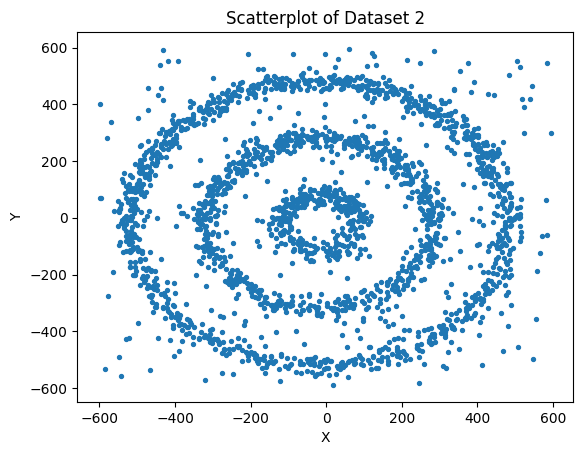

In [ ]:
x = dataset1[:, 0] 
y = dataset1[:, 1]

plt.scatter(x, y,s=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of Dataset 2')
plt.show()

Scatter Plot representing points in given dataset 2

Text(0.5, 1.0, 'Elbow curve for dataset 2')

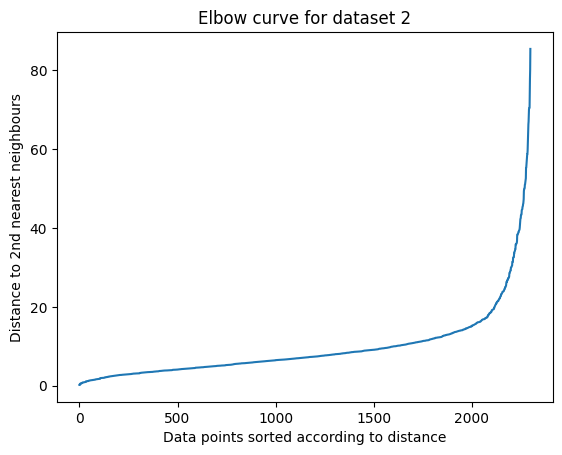

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dataset1)
distances, indices = neighbors_fit.kneighbors(dataset1)

sorted_dist = np.sort(distances,axis=0)
sorted_dist = sorted_dist[:,1]
plt.plot(sorted_dist)
plt.xlabel('Data points sorted according to distance')
plt.ylabel('Distance to 2nd nearest neighbours')
plt.title('Elbow curve for dataset 2')

As we can see the elbow curve takes a acurate curve between 20 and 40, so we will test for epsilon in range 20 - 40

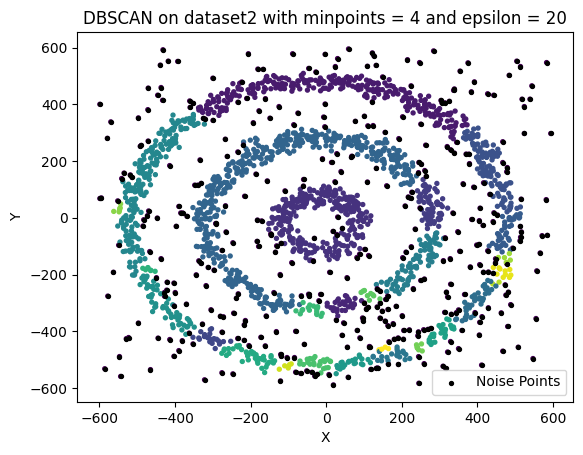

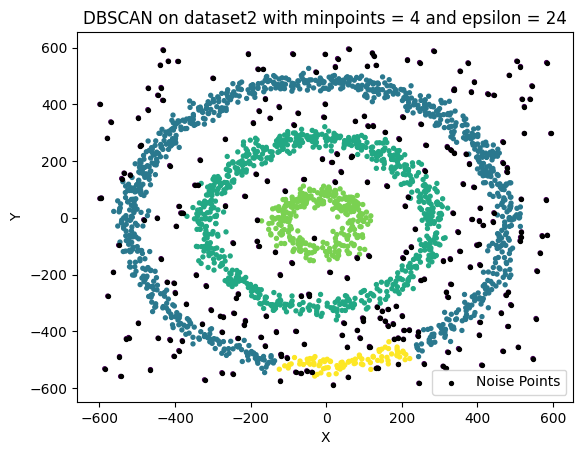

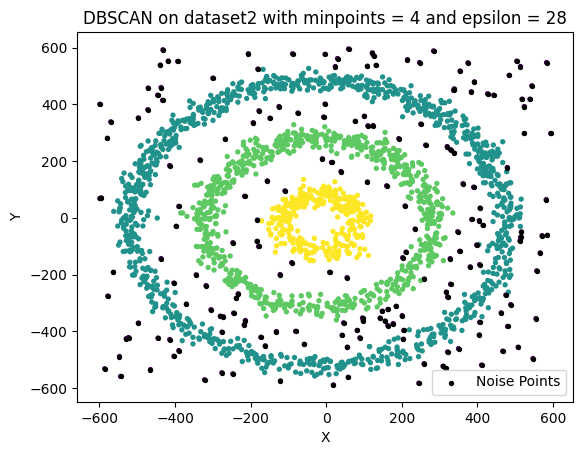

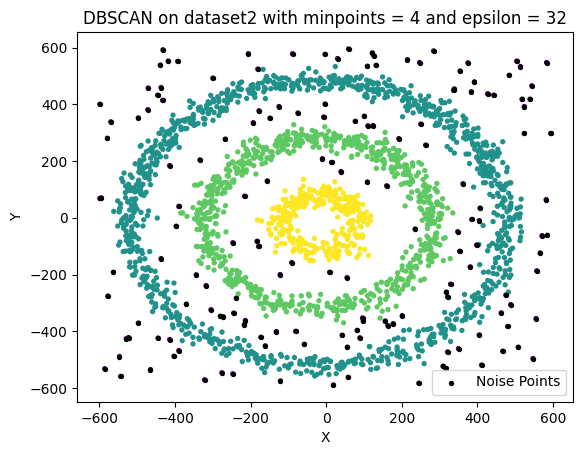

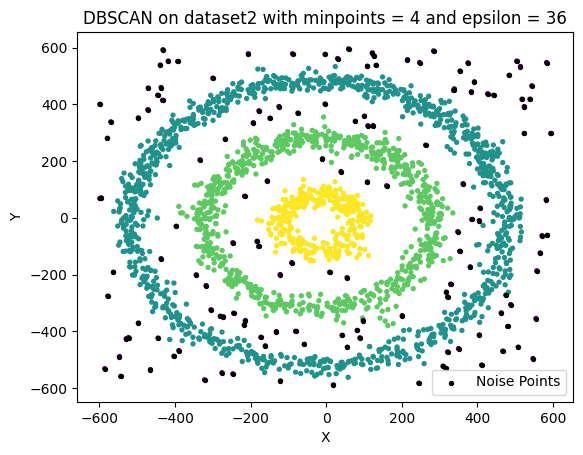

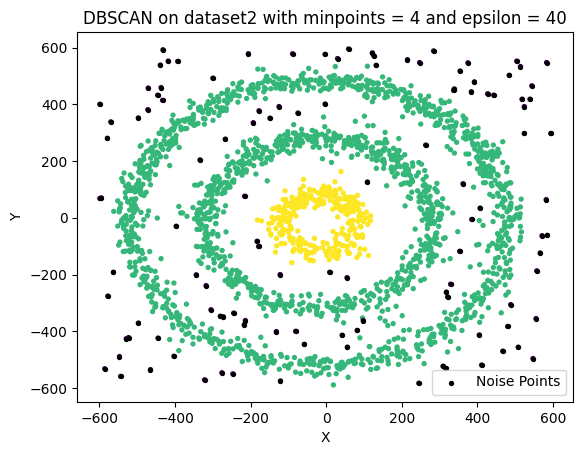

In [ ]:
minpoints = 4

for i in range(20, 41, 4):
    fig = plt.figure()
    dbscan = DBSCAN(i, minpoints)
    dbscan.fit(dataset1)

    labels = dbscan.labels

    plt.scatter(dataset1[:,0], dataset1[:,1], c=labels, s=8)
    noise_indices = np.where(labels == -1)[0]
    plt.scatter(dataset1[noise_indices, 0], dataset1[noise_indices, 1], color='black', label='Noise Points', s=8)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("DBSCAN on dataset2 with minpoints = 4 and epsilon = "+str(i))
    plt.legend()
    plt.show()

The best clustering visually can be seen with epsilon = 35 and we get 3 clusters in the scatter plot

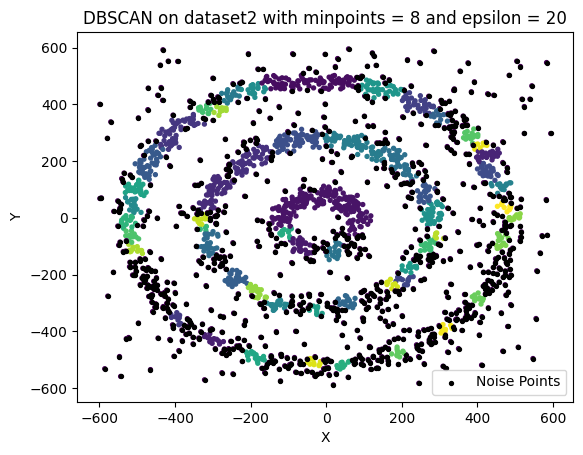

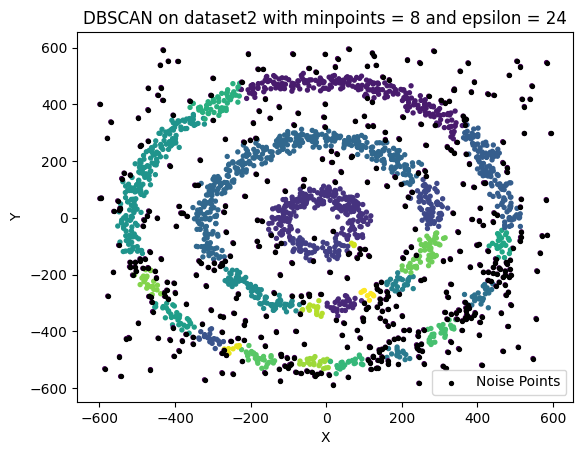

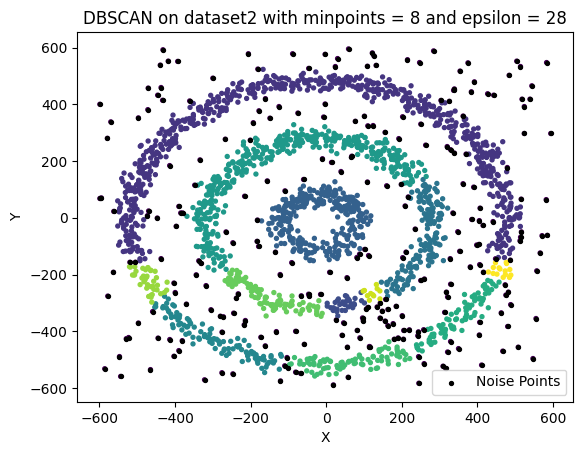

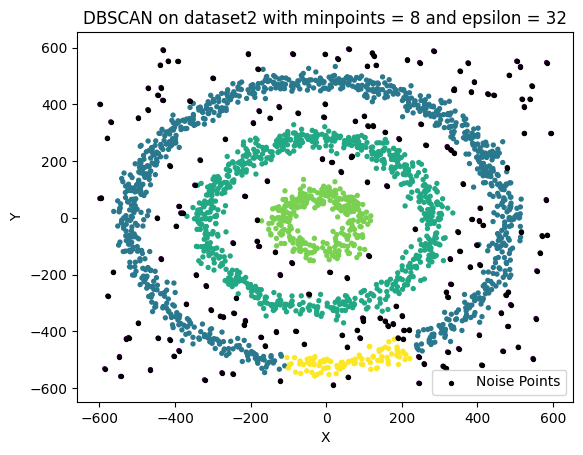

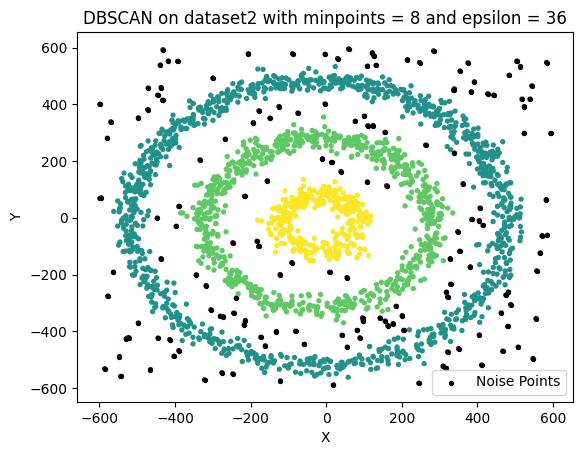

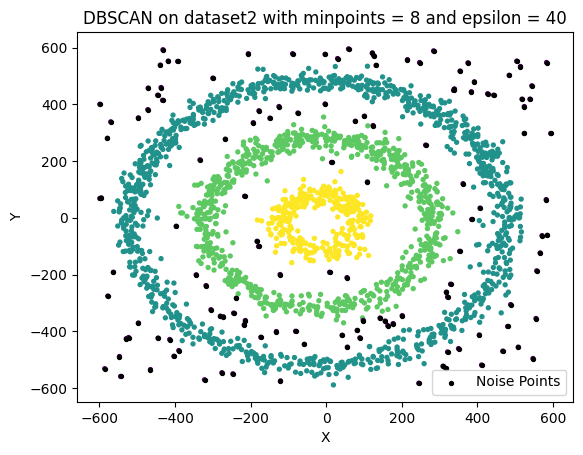

In [ ]:
minpoints = 8

for i in range(20, 41, 4):
    fig = plt.figure()
    dbscan = DBSCAN(i, minpoints)
    dbscan.fit(dataset1)

    labels = dbscan.labels

    plt.scatter(dataset1[:,0], dataset1[:,1], c=labels, s=8)
    noise_indices = np.where(labels == -1)[0]
    plt.scatter(dataset1[noise_indices, 0], dataset1[noise_indices, 1], color='black', label='Noise Points', s=8)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("DBSCAN on dataset2 with minpoints = 8 and epsilon = "+str(i))
    plt.legend()
    plt.show()

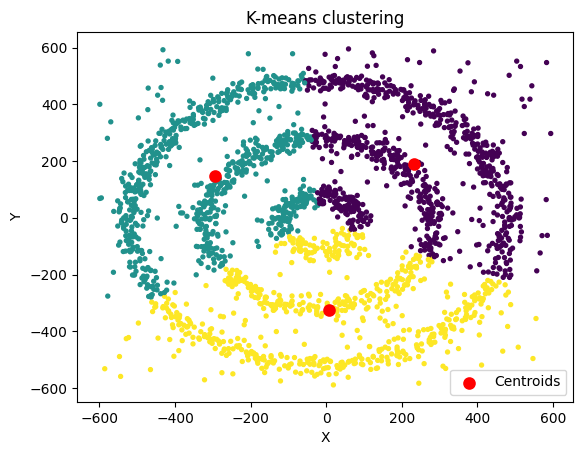

In [134]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(dataset1)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(dataset1[:, 0], dataset1[:, 1], c=labels, s=8)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=50, linewidths=2, color='red', label='Centroids', zorder=10)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means clustering')
plt.legend()
plt.show()


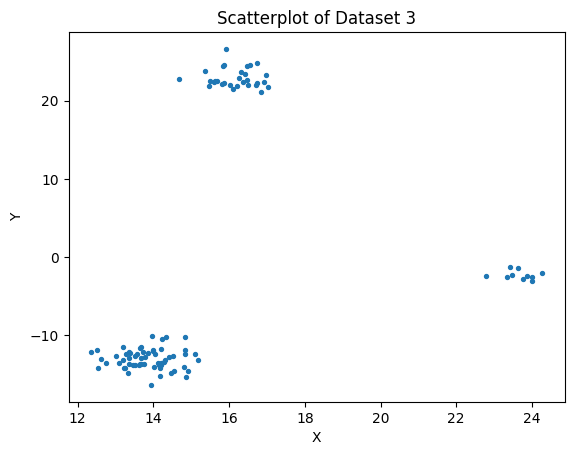

In [ ]:
x2 = dataset2[:, 0] 
y2 = dataset2[:, 1]

plt.scatter(x2, y2,s=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of Dataset 3')
plt.show()

Scatter Plot representing points in given dataset 3

Text(0.5, 1.0, 'Elbow curve for dataset 3')

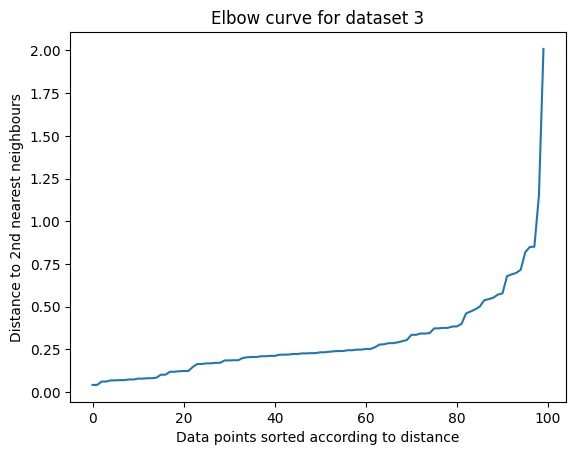

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dataset2)
distances, indices = neighbors_fit.kneighbors(dataset2)

sorted_dist = np.sort(distances,axis=0)
sorted_dist = sorted_dist[:,1]
plt.plot(sorted_dist)
plt.xlabel('Data points sorted according to distance')
plt.ylabel('Distance to 2nd nearest neighbours')
plt.title('Elbow curve for dataset 3')

As we can see the elbow curve takes a acurate curve between 0.8 and 2+, so we will test for epsilon in range 0.8 - 2.5

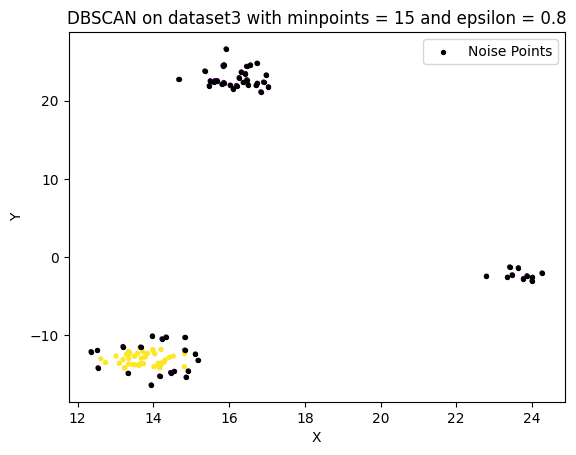

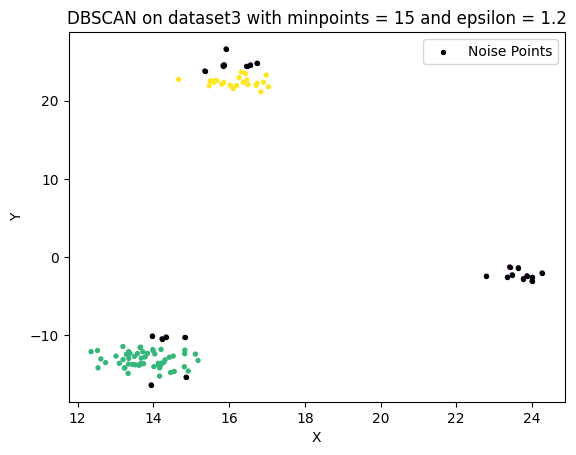

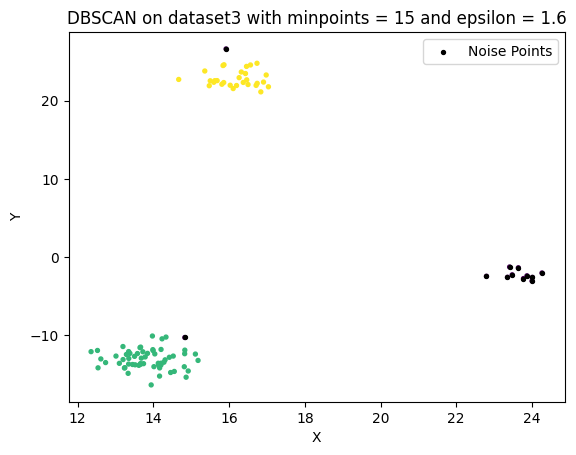

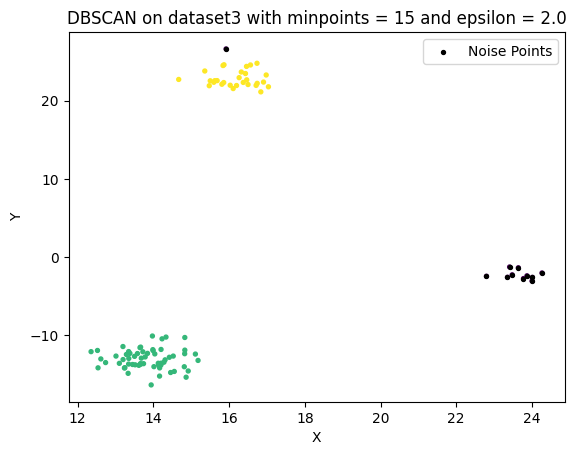

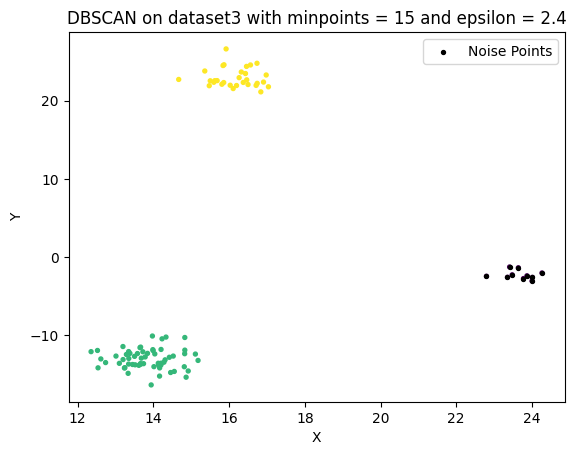

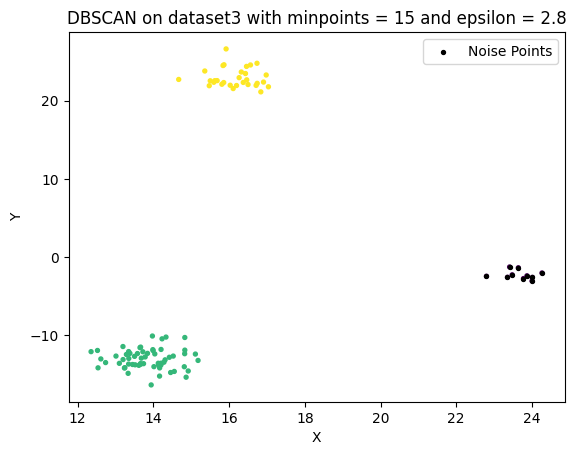

In [ ]:
minpoints = 15

for i in range(4, 15, 2):
    j = i/5.0
    fig = plt.figure()
    dbscan = DBSCAN(j, minpoints)
    dbscan.fit(dataset2)

    labels = dbscan.labels

    plt.scatter(dataset2[:,0], dataset2[:,1], c=labels, s=8)
    noise_indices = np.where(labels == -1)[0]
    plt.scatter(dataset2[noise_indices, 0], dataset2[noise_indices, 1], color='black', label='Noise Points', s=8)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("DBSCAN on dataset3 with minpoints = 15 and epsilon = "+str(j))
    plt.legend()
    plt.show()

The best clustering visually can be seen with epsilon = 2.4 and we get 3 clusters in the scatter plot


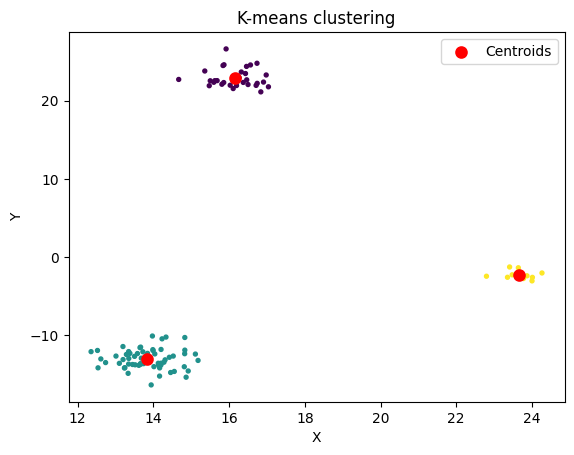

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(dataset2)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(dataset2[:, 0], dataset2[:, 1], c=labels, s=8)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=50, linewidths=2, color='red', label='Centroids', zorder=10)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means clustering')
plt.legend()
plt.show()